<a href="https://colab.research.google.com/github/munisdev86/stable-diffusion/blob/main/dreambooth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers>==0.5.0
!pip install accelerate torchvision
!pip install transformers>=4.21.0
!pip install ftfy tensorboard modelcards


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip freeze|grep diffusers

diffusers @ git+https://github.com/huggingface/diffusers@af04479e858c7fbb2ff3bf4c31f8c077703a339e


In [3]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
!mkdir -p /content/instance-images
!mkdir -p /content/class-images
!mkdir -p /content/model-dir


In [ ]:
# !cp /content/dog/* /content/class-images/

In [ ]:
!ls -al /content/class-images/
# !rm -Rf /content/class-images/dog

In [ ]:
# !cat /root/.cache/huggingface/accelerate/default_config.yaml
!pip install git+https://github.com/huggingface/diffusers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-nl65nwdx
  Running command git clone -q https://github.com/huggingface/diffusers /tmp/pip-req-build-nl65nwdx
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for diffusers: filename=diffusers-0.10.0.dev0-py3-none-any.whl size=476837 sha256=58f679629c258c1059315161b07169895196c87d69ad7edc067e65910760bed5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_9c0xy9r/wheels/c6/77/b7/6d22ce35b79fbe5cc7513554d61c918bb4bf3eac5fdb8ae787
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.9.0
    Uninstalling diffusers-0.9.0:
      Successfully uninstalled diffusers-0.9.0


In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [ ]:
!accelerate config


In [ ]:


# !python3
!ls -al /root/.cache/huggingface/diffusers

In [8]:
# !mv /content/*.jpg /content/cimages/
# !ls -al /content/class-images|grep .ipy
!rm -Rf /content/class-images/.ipynb_checkpoints

In [4]:
import os
os.environ['MODEL_NAME'] = "stabilityai/stable-diffusion-2"
os.environ['INSTANCE_DIR'] = "/content/instance-images/"
os.environ['CLASS_DIR'] = "/content/class-images/"
os.environ['OUTPUT_DIR'] = "/content/model-dir/"

!echo $MODEL_NAME
!echo $INSTANCE_DIR
!echo $CLASS_DIR
!echo $OUTPUT_DIR

stabilityai/stable-diffusion-2
/content/instance-images/
/content/class-images/
/content/model-dir/


In [9]:


  # --pretrained_model_name_or_path="/root/.cache/huggingface/diffusers/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1" \
  # --pretrained_model_name_or_path=$MODEL_NAME \

!accelerate launch --mixed_precision="fp16" train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of sks dog" \
  --class_prompt="a photo of dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --sample_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=1 \
  --max_train_steps=800

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Steps:  62% 500/800 [03:25<01:59,  2.52it/s, loss=0.477, lr=5e-6]
Fetching 12 files: 100% 12/12 [00:00<00:00, 23247.87it/s]
Steps:  62% 500/800 [03:42<01:59,  2.52it/s, loss=0.586, lr=5e-6]Traceback (most recent call last):
  File "train_dreambooth.py", line 713, in <module>
    main(args)
  File "train_dreambooth.py", line 632, in main
    model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/diffusers/models/unet_2d_condition.py", line 371, in forward
    sample = self.conv_in(sample)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)

In [10]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of sks dog" \
  --class_prompt="a photo of dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=1 \
  --max_train_steps=800

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Steps:  62% 500/800 [04:09<02:28,  2.03it/s, loss=0.691, lr=5e-6]
Fetching 12 files: 100% 12/12 [00:00<00:00, 23130.35it/s]
Steps: 100% 800/800 [06:53<00:00,  1.83it/s, loss=0.385, lr=5e-6]
Fetching 12 files: 100% 12/12 [00:00<00:00, 21138.87it/s]
Steps: 100% 800/800 [07:06<00:00,  1.88it/s, loss=0.385, lr=5e-6]


In [15]:
!rm -Rf /content/model-dir/
!mkdir -p /content/model-dir/

In [16]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of sks dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=400

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Steps: 100% 400/400 [03:16<00:00,  2.36it/s, loss=0.11, lr=5e-6]
Fetching 12 files: 100% 12/12 [00:00<00:00, 23247.87it/s]
Steps: 100% 400/400 [03:33<00:00,  1.87it/s, loss=0.11, lr=5e-6]


  0%|          | 0/50 [00:00<?, ?it/s]

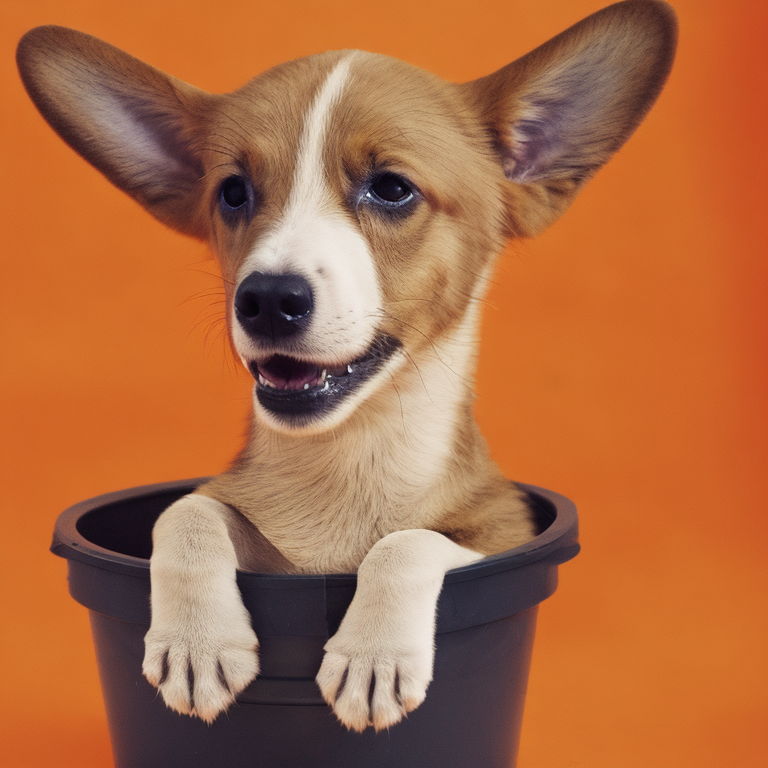

In [18]:

from diffusers import StableDiffusionPipeline
import torch

model_id = "/content/model-dir/"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

prompt = "A photo of sks dog in a bucket"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

image.save("dog-bucket.png")
image


In [ ]:
!nvidia-smi


Tue Dec  6 05:59:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    43W / 400W |      3MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionUpscalePipeline
import torch
from PIL import Image

model_id = "stabilityai/stable-diffusion-2"

attn_slicing_enabled = True
mem_eff_attn_enabled = True





scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

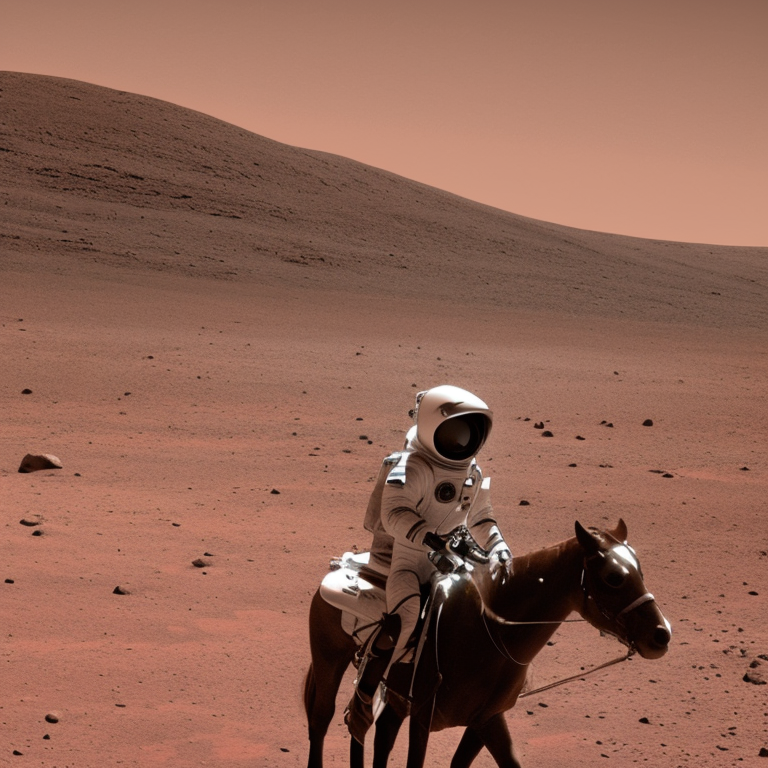

In [ ]:
generator = torch.Generator("cuda").manual_seed(42)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768, generator=generator).images[0]
    
image

In [ ]:
!ls -al ~


In [ ]:
!whoami

In [ ]:
!ls -al ~/.cache/huggingface/diffusers/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1



total 28
drwxr-xr-x 7 root root 4096 Dec  6 06:00 .
drwxr-xr-x 4 root root 4096 Dec  6 05:59 ..
lrwxrwxrwx 1 root root   52 Dec  6 05:59 model_index.json -> ../../blobs/0f1585c5c4c72250568803e5ab7ceb64599d02c2
drwxr-xr-x 2 root root 4096 Dec  6 05:59 scheduler
drwxr-xr-x 2 root root 4096 Dec  6 05:59 text_encoder
drwxr-xr-x 2 root root 4096 Dec  6 05:59 tokenizer
drwxr-xr-x 2 root root 4096 Dec  6 06:00 unet
drwxr-xr-x 2 root root 4096 Dec  6 06:00 vae


In [ ]:
!pwd

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              12
On-line CPU(s) list: 0-11
Thread(s) per core:  2
Core(s) per socket:  6
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            7
CPU MHz:             2200.212
BogoMIPS:            4400.42
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0-11
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid